In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml("mnist_784")

In [3]:
mnist.data.shape

(70000, 784)

In [4]:
mnist.target.shape

(70000,)

In [5]:
print(mnist.target)

['5' '0' '4' ... '4' '5' '6']


In [6]:
print(mnist.data)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [7]:
print(mnist.data[0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.
   0. 

In [8]:
import matplotlib.pyplot as plt 

%matplotlib inline

In [9]:
import numpy as np 

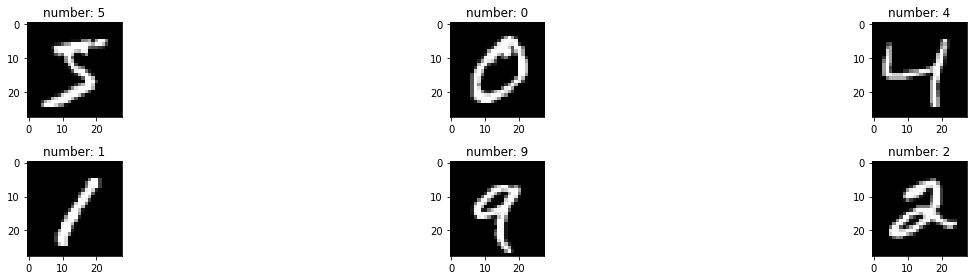

In [10]:
plt.figure(figsize=(20,4))
for index, (image,label) in enumerate(zip(mnist.data[:6], mnist.target[:6])):
    plt.subplot(2,3,index+1)
    plt.tight_layout()
    plt.imshow(np.reshape(image, (28,28)), cmap="gray")
    plt.title("number: %s" %label)

In [11]:
from sklearn import metrics

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

In [16]:
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [17]:
predictions = knn.predict(X_test)
score = knn.score(X_test, y_test)
print(score)

0.9732857142857143


In [18]:
cm = metrics.confusion_matrix(y_test, predictions)
cm

array([[1367,    1,    2,    0,    0,    2,    2,    0,    0,    0],
       [   0, 1609,    4,    1,    1,    0,    0,    4,    0,    1],
       [   7,    7, 1330,    2,    0,    1,    0,   24,    7,    0],
       [   1,    4,    4, 1376,    0,    9,    1,    6,    4,    7],
       [   2,   12,    0,    1, 1295,    0,    8,    0,    1,   28],
       [   5,    0,    1,   14,    2, 1237,   20,    0,    2,    3],
       [   4,    3,    1,    0,    1,    3, 1294,    0,    0,    0],
       [   0,   15,    1,    1,    3,    0,    0, 1395,    1,   15],
       [   4,   12,    2,   19,    6,   18,    5,    7, 1290,    5],
       [   2,    2,    0,    7,    6,    4,    1,   21,    4, 1433]],
      dtype=int64)

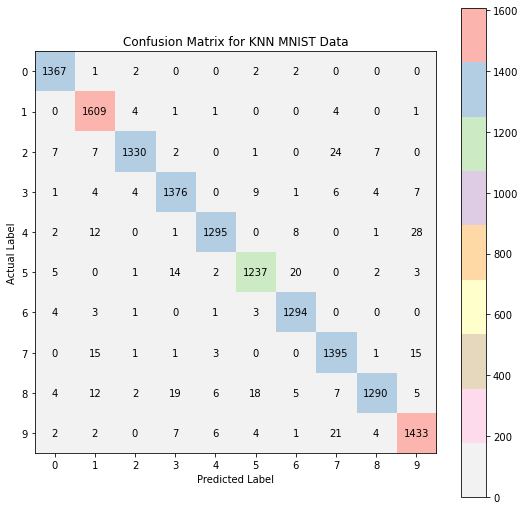

In [19]:
plt.figure(figsize=(9,9))
plt.imshow(cm, cmap='Pastel1_r')
plt.title('Confusion Matrix for KNN MNIST Data')

plt.xticks(np.arange(10))
plt.yticks(np.arange(10))

plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

plt.colorbar()

width, height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y,x), horizontalalignment='center', verticalalignment='center')